In [ ]:
%matplotlib inline


# Deep CCA (DCCA) Tutorial

Deep CCA is an extension of Canonical Correlation Analysis which uses 2
Deep Neural Networks to transform each view into a lower dimensional space
which is highly correlated with the other. This can be used to uncover
latent nonlinear relations between views and is often used for feature
learning.

This tutorial uses a synthetic multiview dataset which contains
latent information shared between the views, and DCCA is used to uncover
this information in a low dimensional embedding.


In [1]:
# License: MIT

import numpy as np
from mvlearn.embed import DCCA
from mvlearn.datasets import make_gaussian_mixture
from mvlearn.plotting import crossviews_plot
from mvlearn.model_selection import train_test_split

## Polynomial-Transformed Latent Correlation

Latent variables are sampled from two multivariate Gaussians with equal
prior probability. Then a polynomial transformation is applied and noise is
added independently to both the transformed and untransformed latents.



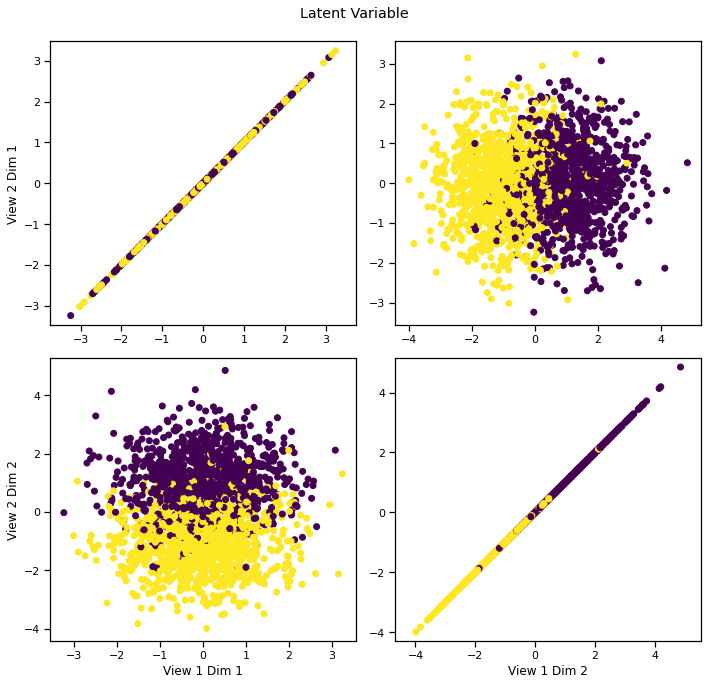

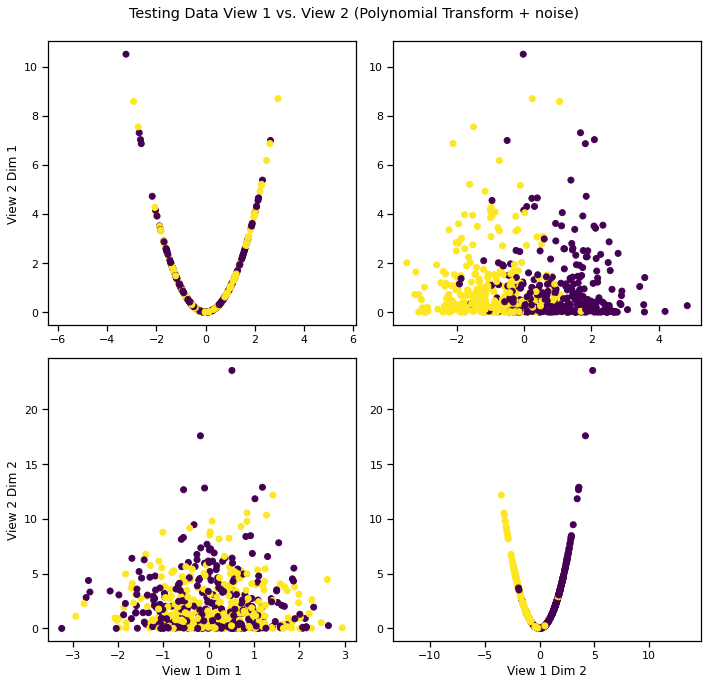

In [5]:
n_samples = 2000
means = [[0, 1], [0, -1]]
covariances = [np.eye(2), np.eye(2)]
Xs, y, latent = make_gaussian_mixture(
      n_samples, means, covariances, transform='poly', random_state=42,
      shuffle=True, shuffle_random_state=42, return_latents=True)

# Plot latent data against itself to reveal the underlying distribtution.
crossviews_plot([latent, latent], labels=y,
                title='Latent Variable', equal_axes=True)


# Split data into train and test sets
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3,
                                                      random_state=42)


# Plot the testing data after polynomial transformation
crossviews_plot(Xs_test, labels=y_test,
                title='Testing Data View 1 vs. View 2 '
                      '(Polynomial Transform + noise)',
                equal_axes=True)

## Fit DCCA Model to Uncover Latent Distribution

The output dimensionality is still 4.



In [8]:
# Define parameters and layers for deep model
features1 = Xs_train[0].shape[1]  # Feature sizes
print(features1)

features2 = Xs_train[1].shape[1]
print(features2)

layers1 = [256, 256, 4]  # nodes in each hidden layer and the output size
layers2 = [256, 256, 4]

dcca = DCCA(input_size1=features1, input_size2=features2, n_components=4,
            layer_sizes1=layers1, layer_sizes2=layers2, epoch_num=500)
dcca.fit(Xs_train)
Xs_transformed = dcca.transform(Xs_test)
print(Xs_transformed)

2
2
[array([[ 2.8491431 ,  2.01120691,  0.3268331 , -1.2318813 ],
       [-1.11167501,  1.30177531,  0.02180513,  0.57686504],
       [-1.13755166,  1.34880269,  0.54795056,  0.82185033],
       ...,
       [-0.07521592, -0.96655439, -0.52889099, -0.77281322],
       [-1.18073298,  1.58127282, -1.25583482,  0.50911111],
       [ 0.83496208, -0.42808227, -0.74541132,  1.32806677]]), array([[ 2.89800648,  1.96673631,  0.30527295, -1.12207704],
       [-1.12384191,  1.35601892,  0.10721978,  0.68483191],
       [-1.14372656,  1.38976678,  0.41161102,  0.84353407],
       ...,
       [-0.05594234, -0.97650558, -0.58435252, -0.6699094 ],
       [-1.18002094,  1.60127525, -1.26905981,  0.54247113],
       [ 0.84649257, -0.38609964, -0.68015903,  1.20342626]])]


## Visualize the Transformed Data

We can see that it has uncovered the latent correlation between views.



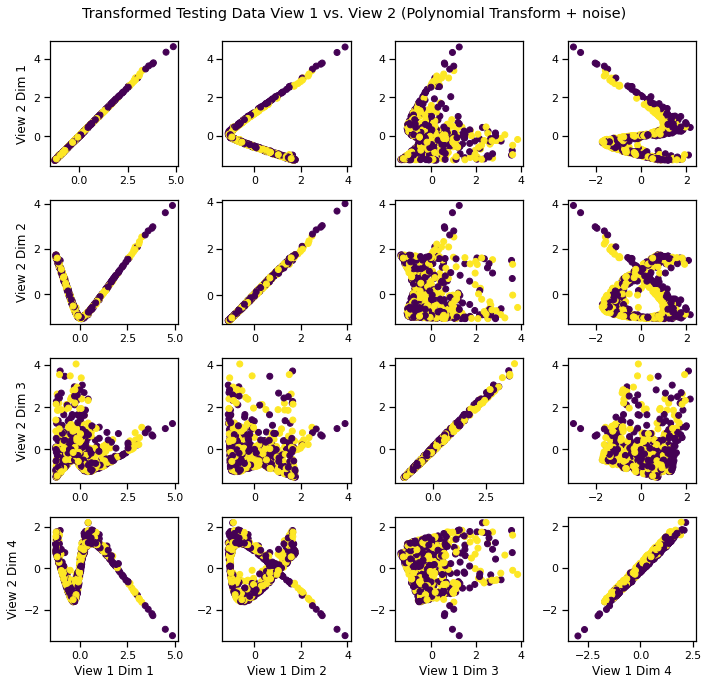

In [9]:
crossviews_plot(Xs_transformed, labels=y_test,
                title='Transformed Testing Data View 1 vs. View 2 '
                      '(Polynomial Transform + noise)',
                equal_axes=True)

## Sinusoidal-Transformed Latent Correlation

Following the same procedure as above, latent variables are sampled from two
multivariate Gaussians with equal prior probability. This time, a sinusoidal
transformation is applied and noise is added independently to both the
transformed and untransformed latents.



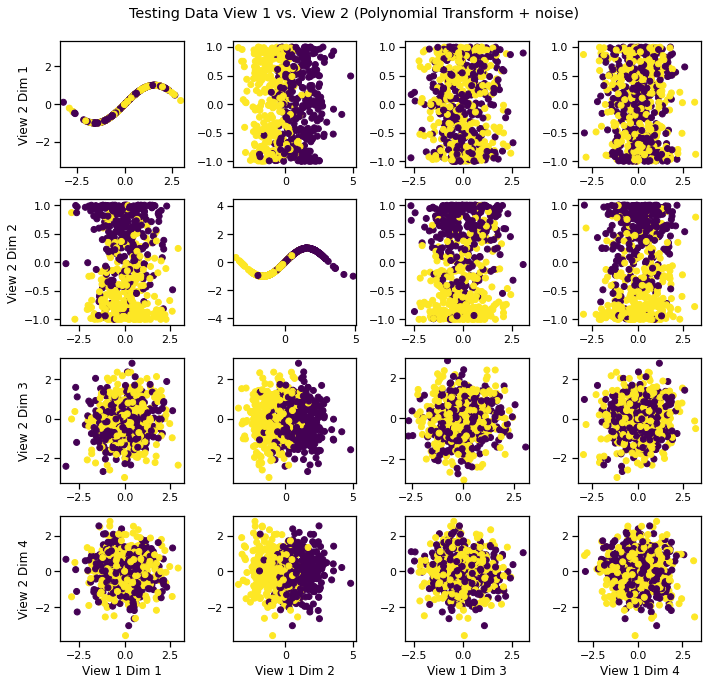

In [10]:
n_samples = 2000
means = [[0, 1], [0, -1]]
covariances = [np.eye(2), np.eye(2)]
Xs, y, latent = make_gaussian_mixture(
      n_samples, means, covariances, transform='sin', random_state=42,
      shuffle=True, shuffle_random_state=42, return_latents=True, noise_dims=2)

# Split data into train and test segments
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3,
                                                      random_state=42)

# Plot the testing data against itself after polynomial transformation
crossviews_plot(Xs_test, labels=y_test,
                title='Testing Data View 1 vs. View 2 '
                      '(Polynomial Transform + noise)',
                equal_axes=True)

## Fit DCCA Model to Uncover Latent Distribution

The output dimensionality is still 4.



In [11]:
# Define parameters and layers for deep model
features1 = Xs_train[0].shape[1]  # Feature sizes
features2 = Xs_train[1].shape[1]
layers1 = [256, 256, 4]  # nodes in each hidden layer and the output size
layers2 = [256, 256, 4]

dcca = DCCA(input_size1=features1, input_size2=features2, n_components=4,
            layer_sizes1=layers1, layer_sizes2=layers2, epoch_num=500)
dcca.fit(Xs_train)
Xs_transformed = dcca.transform(Xs_test)

## Visualize the Transformed Data

We can see that it has uncovered the latent correlation between views.



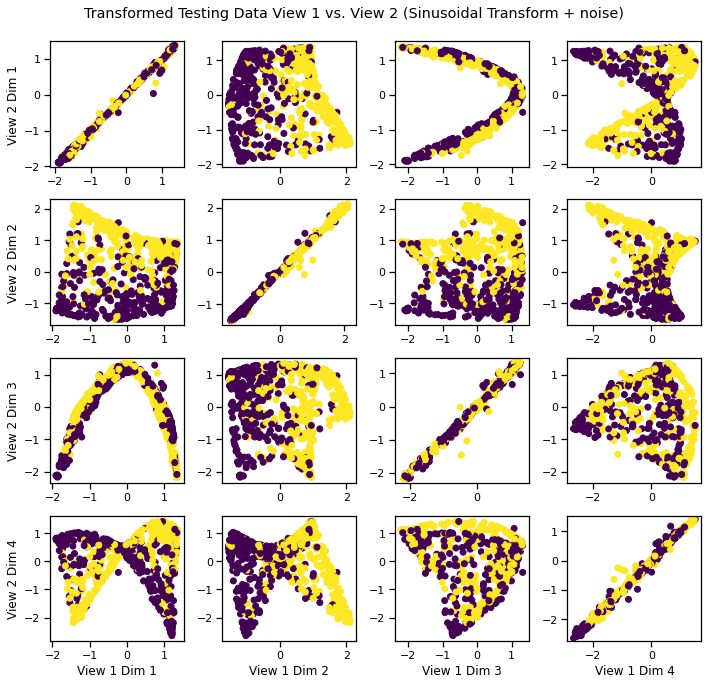

In [12]:
crossviews_plot(Xs_transformed, labels=y_test,
                title='Transformed Testing Data View 1 vs. View 2 '
                      '(Sinusoidal Transform + noise)',
                equal_axes=True)